## Decision Trees

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
%matplotlib inline

In [2]:
data_df = pd.read_csv("data_process_cum.csv")
data_df.columns

Index(['Days.Since', 'Reexp1', 'Reexp2', 'Avoid1', 'Avoid2', 'NACM1', 'NACM2',
       'AAR1', 'AAR2', 'Sleep', 'Pain', 'Reexp1_cum', 'Reexp2_cum',
       'Avoid1_cum', 'Avoid2_cum', 'NACM1_cum', 'NACM2_cum', 'AAR1_cum',
       'AAR2_cum', 'Sleep_cum', 'Pain_cum', 'Threshold'],
      dtype='object')

In [3]:
data_df.head(3)

,Days.Since,Reexp1,Reexp2,Avoid1,Avoid2,NACM1,NACM2,AAR1,AAR2,Sleep,...,Reexp2_cum,Avoid1_cum,Avoid2_cum,NACM1_cum,NACM2_cum,AAR1_cum,AAR2_cum,Sleep_cum,Pain_cum,Threshold
0,2.0,2.0,2.50,3.00,3.000,2.00,0.00,0.0,0.50,0.50,...,2.500,3.00,3.0000,2.000,0.000,0.0,0.500,0.50,5.500,1
1,5.5,1.0,1.25,0.75,1.125,1.50,0.75,0.0,0.00,0.75,...,3.750,3.75,4.1250,3.500,0.750,0.0,0.500,1.25,9.500,1
2,9.5,0.0,0.50,0.75,1.000,0.75,0.00,0.0,0.25,1.25,...,2.125,2.25,2.5625,2.125,0.375,0.0,0.375,1.25,6.125,1


In [4]:
dataset = data_df.as_matrix()
X = dataset[:,0:21]

#last column is the target
y = dataset[:,21:22]

# standardize the data attributes
standardized_X = preprocessing.scale(X)

In [5]:
# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(standardized_X, y.ravel(), test_size=0.3, random_state=4)

### Decision Tree Classifier

In [6]:
dtc = DecisionTreeClassifier(random_state=4)      
dtc = dtc.fit(X_train,y_train)

ac = accuracy_score(y_test,dtc.predict(X_test))
print('Accuracy is: ',ac)

Accuracy is:  0.8982558139534884


### Decision Tree Cross validation 

In [7]:
# evaluate the model using 10-fold cross-validation
cv_scores = cross_val_score(DecisionTreeClassifier(random_state=4), standardized_X, y.ravel(), scoring='accuracy', cv=10)
print(cv_scores)

print("The Cross validation score on Decision Tree:",cv_scores.mean())


[0.64347826 0.83478261 0.46086957 0.87826087 0.83333333 0.78947368
 0.59649123 0.42105263 0.51754386 0.31578947]
The Cross validation score on Decision Tree: 0.6291075514874143


### Random Forest 

In [8]:
rfc = RandomForestClassifier(n_estimators=100,random_state=4)     
rfc = rfc.fit(X_train,y_train)
ac_rfc = accuracy_score(y_test,rfc.predict(X_test))
print('Accuracy is: ',ac_rfc)

Accuracy is:  0.9622093023255814


### Random Forest Feature Importance 

Feature ranking:
1. feature 6 (0.109724)
2. feature 5 (0.106167)
3. feature 8 (0.073700)
4. feature 14 (0.053578)
5. feature 11 (0.053545)
6. feature 2 (0.049967)
7. feature 13 (0.049513)
8. feature 3 (0.049001)
9. feature 19 (0.045678)
10. feature 18 (0.043905)
11. feature 10 (0.042134)
12. feature 12 (0.041634)
13. feature 1 (0.040980)
14. feature 20 (0.040341)
15. feature 16 (0.038969)
16. feature 15 (0.038540)
17. feature 17 (0.035849)
18. feature 9 (0.029186)
19. feature 7 (0.025517)
20. feature 4 (0.024931)
21. feature 0 (0.007143)


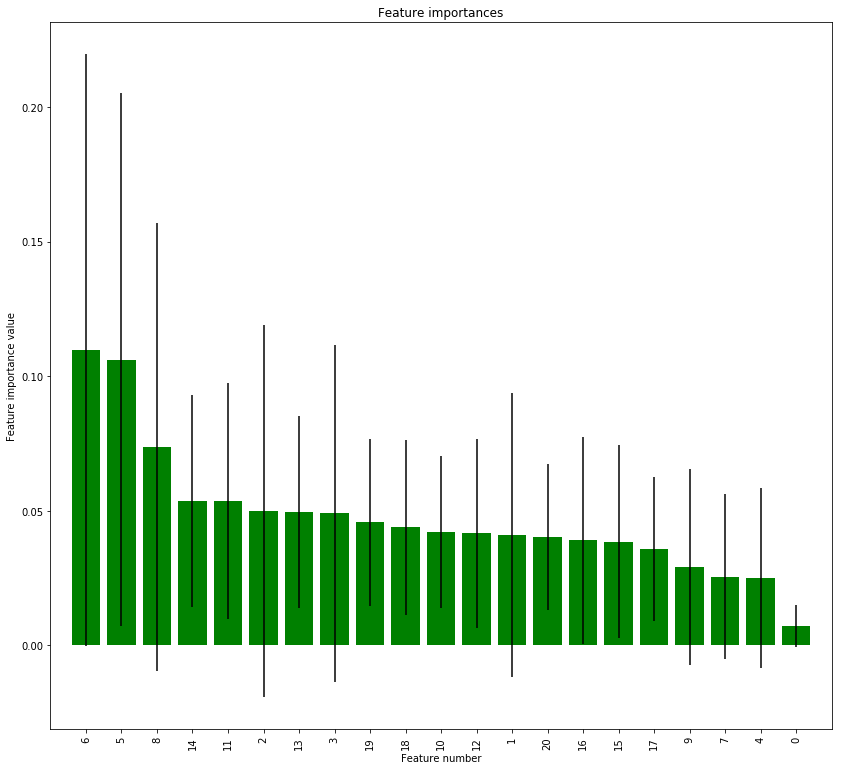

In [9]:
import numpy as np
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
labels =[]
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    labels.append(indices[f])
# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
 
plt.xticks(range(X_train.shape[1]), labels,rotation=90)
plt.xlabel("Feature number")
plt.ylabel("Feature importance value")
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Random Forest Cross validation

In [10]:
# evaluate the model using 10-fold cross-validation
rfc_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100,random_state=4), standardized_X, y.ravel(), scoring='accuracy', cv=10)
print(rfc_cv_scores)

print("The Cross validation score on Random Forest:",rfc_cv_scores.mean())

[0.89565217 0.92173913 0.54782609 0.88695652 0.86842105 0.84210526
 0.68421053 0.45614035 0.40350877 0.54385965]
The Cross validation score on Random Forest: 0.7050419527078566
